In [1]:
%load_ext autoreload
%autoreload 2

%matplotlib inline

In [2]:
from exp.nb_07a import *

In [3]:

datasets.URLs.IMAGENETTE_160

'https://s3.amazonaws.com/fast-ai-imageclas/imagenette-160'

# Use imagenette

In [4]:
path = datasets.untar_data(datasets.URLs.IMAGENETTE_160)
path

PosixPath('/home/quantran/.fastai/data/imagenette-160')

In [5]:
import PIL,os,mimetypes
Path.ls = lambda x: list(x.iterdir()) # so you can do path.ls()

In [6]:
path.ls()

[PosixPath('/home/quantran/.fastai/data/imagenette-160/train'),
 PosixPath('/home/quantran/.fastai/data/imagenette-160/val')]

In [7]:
(path/'train').ls()

[PosixPath('/home/quantran/.fastai/data/imagenette-160/train/n03000684'),
 PosixPath('/home/quantran/.fastai/data/imagenette-160/train/n03425413'),
 PosixPath('/home/quantran/.fastai/data/imagenette-160/train/n03445777'),
 PosixPath('/home/quantran/.fastai/data/imagenette-160/train/n02979186'),
 PosixPath('/home/quantran/.fastai/data/imagenette-160/train/n01440764'),
 PosixPath('/home/quantran/.fastai/data/imagenette-160/train/n03417042'),
 PosixPath('/home/quantran/.fastai/data/imagenette-160/train/n02102040'),
 PosixPath('/home/quantran/.fastai/data/imagenette-160/train/n03028079'),
 PosixPath('/home/quantran/.fastai/data/imagenette-160/train/n03888257'),
 PosixPath('/home/quantran/.fastai/data/imagenette-160/train/n03394916')]

In [8]:
(path/'val').ls()

[PosixPath('/home/quantran/.fastai/data/imagenette-160/val/n03000684'),
 PosixPath('/home/quantran/.fastai/data/imagenette-160/val/n03425413'),
 PosixPath('/home/quantran/.fastai/data/imagenette-160/val/n03445777'),
 PosixPath('/home/quantran/.fastai/data/imagenette-160/val/n02979186'),
 PosixPath('/home/quantran/.fastai/data/imagenette-160/val/n01440764'),
 PosixPath('/home/quantran/.fastai/data/imagenette-160/val/n03417042'),
 PosixPath('/home/quantran/.fastai/data/imagenette-160/val/n02102040'),
 PosixPath('/home/quantran/.fastai/data/imagenette-160/val/n03028079'),
 PosixPath('/home/quantran/.fastai/data/imagenette-160/val/n03888257'),
 PosixPath('/home/quantran/.fastai/data/imagenette-160/val/n03394916')]

# Look at data

In [9]:
path_tench = path/'val'/'n01440764'
img_fn = path_tench/'ILSVRC2012_val_00007197.JPEG'
img_fn

PosixPath('/home/quantran/.fastai/data/imagenette-160/val/n01440764/ILSVRC2012_val_00007197.JPEG')

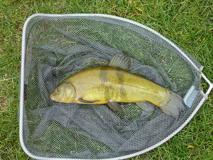

In [10]:
img = PIL.Image.open(img_fn)
img

# few helper functions: read files/get full img path with condition ...

In [11]:
image_extensions = set(k for k,v in mimetypes.types_map.items() if v.startswith('image/'))
image_extensions

{'.bmp',
 '.gif',
 '.ico',
 '.ief',
 '.jpe',
 '.jpeg',
 '.jpg',
 '.pbm',
 '.pgm',
 '.png',
 '.pnm',
 '.ppm',
 '.ras',
 '.rgb',
 '.svg',
 '.tif',
 '.tiff',
 '.xbm',
 '.xpm',
 '.xwd'}

In [12]:
# to check whether something is in a list
def setify(o): return o if isinstance(o,set) else set(listify(o))

In [13]:
# go through one directory and grab all img type files
def _get_files(p, fs, extensions=None):
    p = Path(p)
    res = [p/f for f in fs if not f.startswith('.')
           and ((not extensions) or f'.{f.split(".")[-1].lower()}' in extensions)]
    return res

In [14]:
list(os.walk(path))[:2] # depth first search walk

[('/home/quantran/.fastai/data/imagenette-160', ['train', 'val'], []),
 ('/home/quantran/.fastai/data/imagenette-160/train',
  ['n03000684',
   'n03425413',
   'n03445777',
   'n02979186',
   'n01440764',
   'n03417042',
   'n02102040',
   'n03028079',
   'n03888257',
   'n03394916'],
  [])]

In [15]:
list(os.scandir(path_tench))[0].name

'ILSVRC2012_val_00030740.JPEG'

In [16]:
list(os.scandir(path))

[<DirEntry 'train'>, <DirEntry 'val'>]

In [17]:
# concat path and file names: path/file_name
def _get_files(p, fs, extensions=None):
    p = Path(p)
    res = [p/f for f in fs if not f.startswith('.')
           and ((not extensions) or f'.{f.split(".")[-1].lower()}' in extensions)]
    return res

In [18]:
def get_files(path, extensions=None, recurse=False, include=None):
    # return the full path of files
    path = Path(path)
    extensions = setify(extensions)
    extensions = {e.lower() for e in extensions}
    if recurse:
        res = []
        # walk recursively in directories to find files
        for i,(p,d,f) in enumerate(os.walk(path)): # returns (dirpath, dirnames, filenames)
            
            # we can change the list of directory we want os to 'walk' through next, using 'include'
            if include is not None and i==0: d[:] = [o for o in d if o in include]
            else:                            d[:] = [o for o in d if not o.startswith('.')]
#             print(d)
                
            res += _get_files(p, f, extensions)
        return res
    else:
        f = [o.name for o in os.scandir(path) if o.is_file()] #get only file name from the path
        return _get_files(path, f, extensions)

### get all full img path (ignore directory)

In [19]:
get_files(path_tench, image_extensions)[:3]

[PosixPath('/home/quantran/.fastai/data/imagenette-160/val/n01440764/ILSVRC2012_val_00030740.JPEG'),
 PosixPath('/home/quantran/.fastai/data/imagenette-160/val/n01440764/ILSVRC2012_val_00029930.JPEG'),
 PosixPath('/home/quantran/.fastai/data/imagenette-160/val/n01440764/ILSVRC2012_val_00013716.JPEG')]

In [20]:
(path/'val').ls()

[PosixPath('/home/quantran/.fastai/data/imagenette-160/val/n03000684'),
 PosixPath('/home/quantran/.fastai/data/imagenette-160/val/n03425413'),
 PosixPath('/home/quantran/.fastai/data/imagenette-160/val/n03445777'),
 PosixPath('/home/quantran/.fastai/data/imagenette-160/val/n02979186'),
 PosixPath('/home/quantran/.fastai/data/imagenette-160/val/n01440764'),
 PosixPath('/home/quantran/.fastai/data/imagenette-160/val/n03417042'),
 PosixPath('/home/quantran/.fastai/data/imagenette-160/val/n02102040'),
 PosixPath('/home/quantran/.fastai/data/imagenette-160/val/n03028079'),
 PosixPath('/home/quantran/.fastai/data/imagenette-160/val/n03888257'),
 PosixPath('/home/quantran/.fastai/data/imagenette-160/val/n03394916')]

### get all full img path in validation, recursively

In [21]:
temp = get_files(path/'val', image_extensions,recurse=True) # get all full img path in validation, recursively

In [22]:
temp[:5]

[PosixPath('/home/quantran/.fastai/data/imagenette-160/val/n03000684/ILSVRC2012_val_00045501.JPEG'),
 PosixPath('/home/quantran/.fastai/data/imagenette-160/val/n03000684/ILSVRC2012_val_00045940.JPEG'),
 PosixPath('/home/quantran/.fastai/data/imagenette-160/val/n03000684/ILSVRC2012_val_00009206.JPEG'),
 PosixPath('/home/quantran/.fastai/data/imagenette-160/val/n03000684/ILSVRC2012_val_00047060.JPEG'),
 PosixPath('/home/quantran/.fastai/data/imagenette-160/val/n03000684/ILSVRC2012_val_00046764.JPEG')]

In [23]:
temp[-5:]

[PosixPath('/home/quantran/.fastai/data/imagenette-160/val/n03394916/ILSVRC2012_val_00005548.JPEG'),
 PosixPath('/home/quantran/.fastai/data/imagenette-160/val/n03394916/ILSVRC2012_val_00043988.JPEG'),
 PosixPath('/home/quantran/.fastai/data/imagenette-160/val/n03394916/ILSVRC2012_val_00007155.JPEG'),
 PosixPath('/home/quantran/.fastai/data/imagenette-160/val/n03394916/ILSVRC2012_val_00017407.JPEG'),
 PosixPath('/home/quantran/.fastai/data/imagenette-160/val/n03394916/ILSVRC2012_val_00041247.JPEG')]

### only get img files in directory 'n03425413'

In [24]:

temp = get_files(path/'val', image_extensions,recurse=True,include='n03425413')

In [25]:
temp[:5]

[PosixPath('/home/quantran/.fastai/data/imagenette-160/val/n03425413/ILSVRC2012_val_00013436.JPEG'),
 PosixPath('/home/quantran/.fastai/data/imagenette-160/val/n03425413/ILSVRC2012_val_00035211.JPEG'),
 PosixPath('/home/quantran/.fastai/data/imagenette-160/val/n03425413/ILSVRC2012_val_00031412.JPEG'),
 PosixPath('/home/quantran/.fastai/data/imagenette-160/val/n03425413/ILSVRC2012_val_00037555.JPEG'),
 PosixPath('/home/quantran/.fastai/data/imagenette-160/val/n03425413/ILSVRC2012_val_00017866.JPEG')]

## get all imgs in directory

In [26]:
all_fns = get_files(path, image_extensions, recurse=True)
len(all_fns)

13394

# Creating datablock api

What we need to do:

- Get files
- Split validation set
    - random%, folder name, csv, ...
- Label:
    - folder name, file name/re, csv, ...
- Transform per image (optional)
- Transform to tensor
- DataLoader
- Transform per batch (optional)
- DataBunch
- Add test set (optional)

In [27]:
??ListContainer

## 1. Itemlist

In [28]:
def compose(x, funcs, *args, order_key='_order', **kwargs): 
    # not sure how to add kwargs since compose only got 2 inputs (in _get func in ItemList)
    key = lambda o: getattr(o, order_key, 0)
    for f in sorted(listify(funcs), key=key): x = f(x, **kwargs)
    return x

class ItemList(ListContainer):
    def __init__(self, items, path='.', tfms=None):
        # path?
        # items: for img it will be list of full img paths
        # tfms: list of functions to apply to 1 single item . Only be called in __getitem__ (on the fly)
        super().__init__(items)
        self.path,self.tfms = Path(path),tfms

    def __repr__(self): return f'{super().__repr__()}\nPath: {self.path}'
    
    def new(self, items, cls=None):
        if cls is None: cls=self.__class__ # will  return Children class. Good to initialize Children objs
        return cls(items, self.path, tfms=self.tfms)
    
    def  get(self, i): return i
    def _get(self, i): 
        # use self.get(i) from children class of ItemList to get the item (see ImageList)
        # then apply tfms functions on it (with order)
        return compose(self.get(i), self.tfms)
    
    def __getitem__(self, idx):
        res = super().__getitem__(idx)
        if isinstance(res,list): return [self._get(o) for o in res]
        return self._get(res)

In [29]:
class ImageList(ItemList):
    @classmethod
    def from_files(cls, path, extensions=None, recurse=True, include=None, **kwargs):
        if extensions is None: extensions = image_extensions
        return cls(get_files(path, extensions, recurse=recurse, include=include), 
                   path, **kwargs)
    
    def get(self, fn): return PIL.Image.open(fn) # raw PIL img obj

### Transform functions

In [30]:
class Transform(): _order=0

class MakeRGB(Transform):
    def __call__(self, item): return item.convert('RGB')
# or 
def make_rgb(item): return item.convert('RGB')

In [31]:
il = ImageList.from_files(path, tfms=make_rgb)

In [32]:
il

ImageList (13394 items)
[PosixPath('/home/quantran/.fastai/data/imagenette-160/train/n03000684/n03000684_22294.JPEG'), PosixPath('/home/quantran/.fastai/data/imagenette-160/train/n03000684/n03000684_16537.JPEG'), PosixPath('/home/quantran/.fastai/data/imagenette-160/train/n03000684/n03000684_18140.JPEG'), PosixPath('/home/quantran/.fastai/data/imagenette-160/train/n03000684/n03000684_13440.JPEG'), PosixPath('/home/quantran/.fastai/data/imagenette-160/train/n03000684/n03000684_8890.JPEG'), PosixPath('/home/quantran/.fastai/data/imagenette-160/train/n03000684/n03000684_3853.JPEG'), PosixPath('/home/quantran/.fastai/data/imagenette-160/train/n03000684/n03000684_24435.JPEG'), PosixPath('/home/quantran/.fastai/data/imagenette-160/train/n03000684/n03000684_8408.JPEG'), PosixPath('/home/quantran/.fastai/data/imagenette-160/train/n03000684/n03000684_15843.JPEG'), PosixPath('/home/quantran/.fastai/data/imagenette-160/train/n03000684/n03000684_5543.JPEG')...]
Path: /home/quantran/.fastai/data/im

In [33]:
len(il)

13394

In [65]:
il.items[:3] # raw items from ItemList

[PosixPath('/home/quantran/.fastai/data/imagenette-160/train/n03000684/n03000684_22294.JPEG'),
 PosixPath('/home/quantran/.fastai/data/imagenette-160/train/n03000684/n03000684_16537.JPEG'),
 PosixPath('/home/quantran/.fastai/data/imagenette-160/train/n03000684/n03000684_18140.JPEG')]

In [34]:
type(il[0]),il[:3] # items converted to PIL img and applied RGB func

(PIL.Image.Image,
 [<PIL.Image.Image image mode=RGB size=160x160 at 0x7F8E6C6FC390>,
  <PIL.Image.Image image mode=RGB size=160x240 at 0x7F8E6C6FC2E8>,
  <PIL.Image.Image image mode=RGB size=248x160 at 0x7F8E6C6FC5C0>])

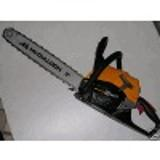

In [35]:
il[0]

## 2. Split train and validation

In [36]:
fn=il.items[0]
fn

PosixPath('/home/quantran/.fastai/data/imagenette-160/train/n03000684/n03000684_22294.JPEG')

In [37]:
fn.parent.name,fn.parent.parent.name

('n03000684', 'train')

In [38]:
def grandparent_splitter(fn, valid_name='valid', train_name='train'):
    gp = fn.parent.parent.name
    return True if gp==valid_name else False if gp==train_name else None

In [39]:
grandparent_splitter(fn)

False

In [40]:
def split_by_func(items, f):
    # split train and validation set
    
    # mask: True -> train, 
    # mask: False-> validation
    mask = [f(o) for o in items]
    # `None` values will be filtered out
    f = [o for o,m in zip(items,mask) if m==False] #train
    t = [o for o,m in zip(items,mask) if m==True ] #valid
    return f,t

In [41]:
splitter = partial(grandparent_splitter, valid_name='val')

In [42]:
%time train,valid = split_by_func(il, splitter)

CPU times: user 25.5 ms, sys: 239 µs, total: 25.7 ms
Wall time: 25.6 ms


In [43]:
len(train),len(valid)

(12894, 500)

### Create class

In [44]:
class SplitData():
    def __init__(self, train, valid): 
        # 2 ItemList or LabeledData inputs
        self.train,self.valid = train,valid
    
    # TODO: what is this?
    def __getattr__(self,k): return getattr(self.train,k)
    
    #This is needed if we want to pickle SplitData and be able to load it back without recursion errors
    def __setstate__(self,data:Any): self.__dict__.update(data) 
    
    @classmethod
    def split_by_func(cls, il, f):
        # get list of 2 new itemlist: [train_itemlist,valid_itemlist]
        lists = map(il.new, 
                    split_by_func(il.items, f))
        
        return cls(*lists)

    def __repr__(self): return f'{self.__class__.__name__}\nTrain: {self.train}\nValid: {self.valid}\n'

In [45]:
sd = SplitData.split_by_func(il, splitter); sd

SplitData
Train: ImageList (12894 items)
[PosixPath('/home/quantran/.fastai/data/imagenette-160/train/n03000684/n03000684_22294.JPEG'), PosixPath('/home/quantran/.fastai/data/imagenette-160/train/n03000684/n03000684_16537.JPEG'), PosixPath('/home/quantran/.fastai/data/imagenette-160/train/n03000684/n03000684_18140.JPEG'), PosixPath('/home/quantran/.fastai/data/imagenette-160/train/n03000684/n03000684_13440.JPEG'), PosixPath('/home/quantran/.fastai/data/imagenette-160/train/n03000684/n03000684_8890.JPEG'), PosixPath('/home/quantran/.fastai/data/imagenette-160/train/n03000684/n03000684_3853.JPEG'), PosixPath('/home/quantran/.fastai/data/imagenette-160/train/n03000684/n03000684_24435.JPEG'), PosixPath('/home/quantran/.fastai/data/imagenette-160/train/n03000684/n03000684_8408.JPEG'), PosixPath('/home/quantran/.fastai/data/imagenette-160/train/n03000684/n03000684_15843.JPEG'), PosixPath('/home/quantran/.fastai/data/imagenette-160/train/n03000684/n03000684_5543.JPEG')...]
Path: /home/quantra

## 3. Preprocessing and Labeling

- Uses training set information to apply to the validation set, using a **Processor**.

- A Processor is a **transformation** that is applied to all the inputs once at initialization, with **some state computed on the training set that is then applied without modification on the validation set** (and maybe the test set or at inference time on a single item). For instance, it could be processing texts to tokenize, then numericalize them. In that case we want the validation set to be numericalized with exactly the same vocabulary as the training set.


    - Another example is in tabular data, where we fill missing values with (for instance) the median computed on the training set. That statistic is stored in the inner state of the Processor and applied on the validation set.

In our case, **we want to convert label strings to numbers in a consistent and reproducible way**. So we create a list of possible labels in the training set, and then convert our labels to numbers based on this vocab.


In [56]:
from collections import OrderedDict

def uniqueify(x, sort=False):
    # exclude duplicate values while maintaining original order
    res = list(OrderedDict.fromkeys(x).keys())
    if sort: res.sort()
    return res

In [54]:
uniqueify([1,2,5,2,6,2])

[1, 2, 5, 6]

In [72]:
class Processor(): #base class
    def process(self, items): return items

class CategoryProcessor(Processor):
    def __init__(self): self.vocab=None
    
    def __call__(self, items):
        # process items: convert several items (label string) to number
        
        #The vocab is defined on the first use.
        if self.vocab is None:
            self.vocab = uniqueify(items)
            # dict {'label1':0,'label2':1, ...}
            self.otoi  = {v:k for k,v in enumerate(self.vocab)}
        return [self.proc1(o) for o in items]
    
    def proc1(self, item): 
        # process 1 item: return index of <item> label
        return self.otoi[item]
    
    def deprocess(self, idxs):
        # convert number to label string
        assert self.vocab is not None
        return [self.deproc1(idx) for idx in idxs]
    def deproc1(self, idx): return self.vocab[idx]

In [57]:
img_fn

PosixPath('/home/quantran/.fastai/data/imagenette-160/val/n01440764/ILSVRC2012_val_00007197.JPEG')

In [58]:
img_fn.parent.name

'n01440764'

```python
class ItemList(ListContainer):
    def __init__(self, items, path='.', tfms=None):
        # path?
        # items: for img it will be list of full img paths
        # tfms: list of functions to apply to 1 single item . Only be called in __getitem__ (on the fly)
        super().__init__(items)
        self.path,self.tfms = Path(path),tfms

    def __repr__(self): return f'{super().__repr__()}\nPath: {self.path}'
    
    def new(self, items, cls=None):
        if cls is None: cls=self.__class__ # will  return Children class. Good to initialize Children objs
        return cls(items, self.path, tfms=self.tfms)
    
    def  get(self, i): return i
    def _get(self, i): 
        # use self.get(i) from children class of ItemList to get the item (see ImageList)
        # then apply tfms functions on it (with order)
        return compose(self.get(i), self.tfms)
    
    def __getitem__(self, idx):
        res = super().__getitem__(idx)
        if isinstance(res,list): return [self._get(o) for o in res]
        return self._get(res)
    
def compose(x, funcs, *args, order_key='_order', **kwargs): 
    # not sure how to add kwargs since compose only got 2 inputs (in _get func in ItemList)
    key = lambda o: getattr(o, order_key, 0)
    for f in sorted(listify(funcs), key=key): x = f(x, **kwargs)
    return x    
```

In [70]:
def parent_labeler(fn): 
    # get label of a specific file path (see above)
    return fn.parent.name

def _label_by_func(ds, f, cls=ItemList): 
    # ds is ItemList
    # apply func f on raw ItemList.items and return new class (ItemList) objects
    return cls([f(o) for o in ds.items], path=ds.path)


class LabeledData():
    def process(self, il, proc): 
        # apply processor on il.items, return new ItemList-based obj while maintaining same tfms and paths
        return il.new(compose(il.items, proc))

    def __init__(self, x, y, proc_x=None, proc_y=None):
        # input x and y are ItemList-based type
        # get new x/y by processing x/y using proc_x/proc_y
        self.x,self.y = self.process(x, proc_x),self.process(y, proc_y)
        self.proc_x,self.proc_y = proc_x,proc_y
        
    def __repr__(self): return f'{self.__class__.__name__}\nx: {self.x}\ny: {self.y}\n'
    def __getitem__(self,idx): 
        # this will apply ItemList tfms and return
        return self.x[idx],self.y[idx] 
    def __len__(self): return len(self.x)
    
    def x_obj(self, idx): return self.obj(self.x, idx, self.proc_x)
    def y_obj(self, idx): return self.obj(self.y, idx, self.proc_y)
    
    def obj(self, items, idx, procs):
        # Deprocess ItemList items[idx] using its own processor
        
        isint = isinstance(idx, int) or (isinstance(idx,torch.LongTensor) and not idx.ndim)
        # items are either processed ItemList x or y
        item = items[idx]
        for proc in reversed(listify(procs)):
            # deprocess ItemList x/y (turn back to original form) in reversed proc_x/proc_y list
            item = proc.deproc1(item) if isint else proc.deprocess(item)
        return item

    @classmethod
    def label_by_func(cls, il, f, proc_x=None, proc_y=None):
        # x: ItemList based
        # y: new ItemList by apply f (some label function)
        return cls(il, _label_by_func(il, f), proc_x=proc_x, proc_y=proc_y)

def label_by_func(sd, f, proc_x=None, proc_y=None):
    # input SplitData (train and valid ItemList)
    # output SplitData (train and valid LabeledData)
    train = LabeledData.label_by_func(sd.train, f, proc_x=proc_x, proc_y=proc_y)
    valid = LabeledData.label_by_func(sd.valid, f, proc_x=proc_x, proc_y=proc_y)
    return SplitData(train,valid)

In [69]:
sd.train,sd.valid

(ImageList (12894 items)
 [PosixPath('/home/quantran/.fastai/data/imagenette-160/train/n03000684/n03000684_22294.JPEG'), PosixPath('/home/quantran/.fastai/data/imagenette-160/train/n03000684/n03000684_16537.JPEG'), PosixPath('/home/quantran/.fastai/data/imagenette-160/train/n03000684/n03000684_18140.JPEG'), PosixPath('/home/quantran/.fastai/data/imagenette-160/train/n03000684/n03000684_13440.JPEG'), PosixPath('/home/quantran/.fastai/data/imagenette-160/train/n03000684/n03000684_8890.JPEG'), PosixPath('/home/quantran/.fastai/data/imagenette-160/train/n03000684/n03000684_3853.JPEG'), PosixPath('/home/quantran/.fastai/data/imagenette-160/train/n03000684/n03000684_24435.JPEG'), PosixPath('/home/quantran/.fastai/data/imagenette-160/train/n03000684/n03000684_8408.JPEG'), PosixPath('/home/quantran/.fastai/data/imagenette-160/train/n03000684/n03000684_15843.JPEG'), PosixPath('/home/quantran/.fastai/data/imagenette-160/train/n03000684/n03000684_5543.JPEG')...]
 Path: /home/quantran/.fastai/data

In [73]:
ll = label_by_func(sd, parent_labeler, proc_y=CategoryProcessor()) # proc_x is none, and being ignored thanks to listify

In [80]:
ll

SplitData
Train: LabeledData
x: ImageList (12894 items)
[PosixPath('/home/quantran/.fastai/data/imagenette-160/train/n03000684/n03000684_22294.JPEG'), PosixPath('/home/quantran/.fastai/data/imagenette-160/train/n03000684/n03000684_16537.JPEG'), PosixPath('/home/quantran/.fastai/data/imagenette-160/train/n03000684/n03000684_18140.JPEG'), PosixPath('/home/quantran/.fastai/data/imagenette-160/train/n03000684/n03000684_13440.JPEG'), PosixPath('/home/quantran/.fastai/data/imagenette-160/train/n03000684/n03000684_8890.JPEG'), PosixPath('/home/quantran/.fastai/data/imagenette-160/train/n03000684/n03000684_3853.JPEG'), PosixPath('/home/quantran/.fastai/data/imagenette-160/train/n03000684/n03000684_24435.JPEG'), PosixPath('/home/quantran/.fastai/data/imagenette-160/train/n03000684/n03000684_8408.JPEG'), PosixPath('/home/quantran/.fastai/data/imagenette-160/train/n03000684/n03000684_15843.JPEG'), PosixPath('/home/quantran/.fastai/data/imagenette-160/train/n03000684/n03000684_5543.JPEG')...]
Path

In [75]:
ll.train.y

ItemList (12894 items)
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0...]
Path: /home/quantran/.fastai/data/imagenette-160

In [79]:
ll.train.y.items[0], ll.train.y_obj(0), ll.train.y_obj([0,1]) # numericalized label, original label, org label with indices

(0, 'n03000684', ['n03000684', 'n03000684'])